<a href="https://colab.research.google.com/github/MFerrugem/FIA_UFPEL/blob/main/Perceptron_MatPlotLib_RNA_UFPEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passos para criar um perceptron usando TensorFlow:**
*   Importar as bibliotecas necessárias
*   Carregar e preparar o dataset
*   Definir e compilar o modelo do perceptron
*   Treinar o modelo
*   Avaliar o modelo

Importando as bibliotecas e carregando o dataset: Importamos o TensorFlow para criar o modelo e funções do scikit-learn para manipular o dataset e realizar a padronização.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


Carregar e preparar o dataset.

Carregamos o dataset Iris e modificamos o problema para ser uma classificação binária. Dividimos o dataset em conjuntos de treinamento e teste e padronizamos os dados.

In [2]:
# Carregar e preparar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Vamos converter o problema em uma classificação binária (separar classe 0 de 1 e 2)
y = (y != 0).astype(int)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Definir e compilar o modelo do perceptron: criamos um modelo sequencial com uma única camada densa com ativação sigmoid, que é adequada para classificação binária.:

In [3]:
# Definir o modelo do perceptron
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Ver a topologia do modelo criado
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinar o modelo: Treinamos o modelo por 100 épocas com um tamanho de lote de 10.

In [6]:
# Treinar o modelo
history=model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5130 - loss: 0.8838  
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 0.7450 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.7150 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5865 - loss: 0.6948
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 0.6917  
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.7359 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6289 - loss: 0.6760 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.6847 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.5931 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6366 - loss: 0.6210 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6930 - loss: 0.6176
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

Avaliação do Modelo: Avaliamos o modelo no conjunto de teste e calculamos a acurácia das previsões.

In [7]:
# Avaliar o modelo
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Accuracy: 100.00%


Plotar a função de perda.

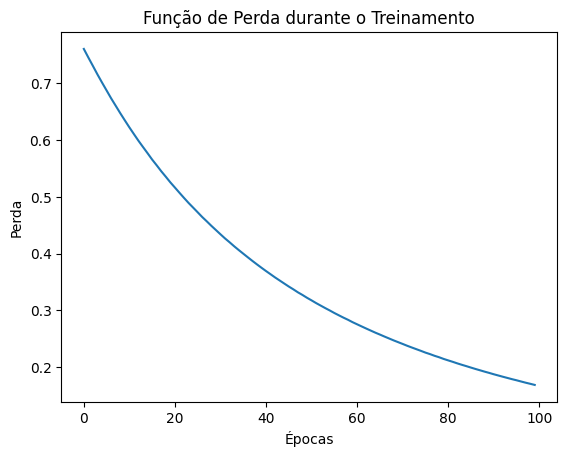

In [8]:
plt.plot(history.history['loss'])
plt.title('Função de Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()